1\. **PCA on 3D dataset**

* Generate a dataset simulating 3 features, each with N entries (N being ${\cal O}(1000)$). Each feature is made by random numbers generated according the normal distribution $N(\mu,\sigma)$ with mean $\mu_i$ and standard deviation $\sigma_i$, with $i=1, 2, 3$. Generate the 3 variables $x_{i}$ such that:
    * $x_1$ is distributed as $N(0,1)$
    * $x_2$ is distributed as $x_1+N(0,3)$
    * $x_3$ is given by $2x_1+x_2$
* Find the eigenvectors and eigenvalues using the eigendecomposition of the covariance matrix
* Find the eigenvectors and eigenvalues using the SVD. Check that the two procedures yield to same result
* What percent of the total dataset's variability is explained by the principal components? Given how the dataset was constructed, do these make sense? Reduce the dimensionality of the system so that at least 99% of the total variability is retained
* Redefine the data according to the new basis from the PCA
* Plot the data, in both the original and the new basis. The figure should have 2 rows (the original and the new basis) and 3 columns (the $[x_0, x_1]$, $[x_0, x_2]$ and $[x_1, x_2]$ projections) of scatter plots.

Covariance matrix
 [[ 1.01247695  0.95561977  2.98057366]
 [ 0.95561977  9.22699088 11.13823041]
 [ 2.98057366 11.13823041 17.09937773]]

Results with eigendecomposition
Eigenvalues:
 [2.53433116e+01 2.25931110e-16 1.99553394e+00] 

Eigenvectors:
 [[-0.12196325 -0.81649658  0.5643211 ]
 [-0.56918612 -0.40824829 -0.71369496]
 [-0.81311261  0.40824829  0.41494724]] 


Results with SVD
Eigenvalues:
 [2.53765450e+01 1.99557017e+00 2.21376953e-32] 

Eigenvectors:
 [[ 0.12198975 -0.56431537  0.81649658]
 [ 0.5691526   0.71372169  0.40824829]
 [ 0.8131321  -0.41490905 -0.40824829]] 

Check if the eigenvalues are the same True
Check if the eigenvectors are the same True

Lambda:
 [[2.53433116e+01 0.00000000e+00 0.00000000e+00]
 [0.00000000e+00 2.25931110e-16 0.00000000e+00]
 [0.00000000e+00 0.00000000e+00 1.99553394e+00]] 

Trace(cov matrix):
 27.338845552903848 

Trace(Lambda):
 27.33884555290384 

By selecting the components 1 and 3, we retain 100.00% of the total variability


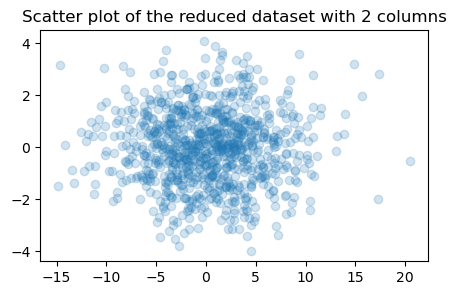

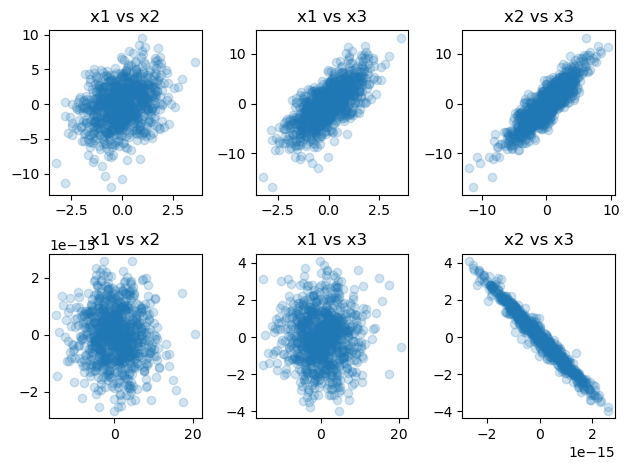

Index1 [0 2 1] Index2 [0 1 2]


In [1]:
#generation of the dataset
import numpy as np
import pandas as pd
from scipy import linalg as la
from matplotlib import pyplot as plt

n_samples = 900
np.random.seed(123)
x1 = np.random.normal(0, 1, n_samples)
x2 = x1 +  np.random.normal(0, 3, n_samples)
x3 = 2*x1 + x2

data = pd.DataFrame({
    "variable 1": x1,
    "variable 2": x2,
    "variable 3": x3,
})

#covariance matrix
cov = np.cov(data, rowvar = False)
print("Covariance matrix\n",cov)

#Find the eigenvectors and eigenvalues 
#using the eigendecomposition of the covariance matrix
l, V = la.eig(cov)
l = np.real_if_close(l)

index1 = np.argsort(l)[::-1]
l_sort = l[index1]
V_sort = V[:,index1]

print("\nResults with eigendecomposition")
print("Eigenvalues:\n", l, '\n')
print("Eigenvectors:\n", V, '\n')

#using the SVD
U, S, Vt = np.linalg.svd(data)
l_svd = S**2/(n_samples-1)

index2 = np.argsort(l_svd)[::-1]
l_svd_sort = l_svd[index2]
Vt_sort = Vt[:,index2]

print("\nResults with SVD")
print("Eigenvalues:\n", l_svd, '\n')
print("Eigenvectors:\n", Vt.T, '\n')

print("Check if the eigenvalues are the same",np.allclose(l_sort, l_svd_sort, atol=1e-1))
print("Check if the eigenvectors are the same",np.allclose(abs(V_sort), abs(Vt_sort), atol=1e-1))

#select different compontents and calculate the total variability
Lambda = np.diag(l)
print("\nLambda:\n", Lambda, '\n')
print("Trace(cov matrix):\n", cov.trace(), '\n')
print("Trace(Lambda):\n", Lambda.trace(), '\n')

print("By selecting the components 1 and 3, we retain %.2f%% of the total variability" % (100*((Lambda[0, 0]+Lambda[2, 2])/Lambda.trace())))

#We obtained a higher variability selecting the variables x1 and x3.
#This make sense for how the data was constructed, in fact x1 and x3 have the highest eigenvalue.

#Reduce the dimensionality of the system
red_eigenval = np.array([l[0], l[2]], dtype=float)
red_eigenvect = np.array([V[:,0], V[:,2]], dtype=float)
red_eigenvect = red_eigenvect.T

#Redefine the reduced data
data_red = np.dot(data,red_eigenvect)

fig_red, ax_red = plt.subplots(figsize=(5, 3))
ax_red.scatter(data_red[:,0], data_red[:,1], alpha = 0.2)
ax_red.set_title('Scatter plot of the reduced dataset with 2 columns')

#take the eigenvectors as new basis vectors and redefine the data points w.r.t this new basis
dataP = np.dot(data,V)

#plots
fig, axs = plt.subplots(2, 3)

axs[0,0].scatter(x1, x2, alpha = 0.2)
axs[0,0].set_title("x1 vs x2")
axs[0,1].scatter(x1, x3, alpha = 0.2)
axs[0,1].set_title("x1 vs x3")
axs[0,2].scatter(x2, x3, alpha = 0.2)
axs[0,2].set_title("x2 vs x3")

axs[1,0].scatter(dataP[:,0], dataP[:,1], alpha = 0.2)
axs[1,0].set_title("x1 vs x2")
axs[1,1].scatter(dataP[:,0], dataP[:,2], alpha = 0.2)
axs[1,1].set_title("x1 vs x3")
axs[1,2].scatter(dataP[:,1], dataP[:,2], alpha = 0.2)
axs[1,2].set_title("x2 vs x3")

plt.tight_layout()
plt.show()


print("Index1",index1,"Index2",index2)


2\. **PCA on a nD dataset**

* Start from the dataset you have genereted in the previous exercise and add uncorrelated random noise. Such noise should be represented by other 10 uncorrelated variables normally distributed, with a standard deviation much smaller (e.g. a factor 20) than those used to generate the $x_1$ and $x_2$. Repeat the PCA procedure and compare the results with what you have obtained before.

           x1        x2        x3    noise1    noise2    noise3    noise4  \
0   -1.085631  0.568276 -1.602985 -0.001151  0.052461  0.031470 -0.008058   
1    0.997345  2.256113  4.250804  0.040628 -0.062082 -0.029483  0.051338   
2    0.282978  5.729935  6.295892 -0.005702  0.093741  0.056223  0.052089   
3   -1.506295 -2.264546 -5.277135  0.007513 -0.013169  0.009349  0.103597   
4   -0.578600 -1.454613 -2.611813  0.018112 -0.011866  0.046761 -0.076464   
..        ...       ...       ...       ...       ...       ...       ...   
895  0.238761  0.229296  0.706817 -0.012721  0.013741  0.045944  0.089989   
896 -1.106386 -2.398365 -4.611137 -0.056748  0.024778 -0.061158 -0.014424   
897  0.366732 -0.072515  0.660949 -0.012850  0.029014 -0.022625  0.026408   
898  1.023906  4.504433  6.552244 -0.010106  0.021899 -0.051971  0.014743   
899 -0.210056 -2.134593 -2.554706 -0.062938  0.047279  0.101159 -0.055176   

       noise5    noise6    noise7    noise8    noise9   noise10  
0   -0.06

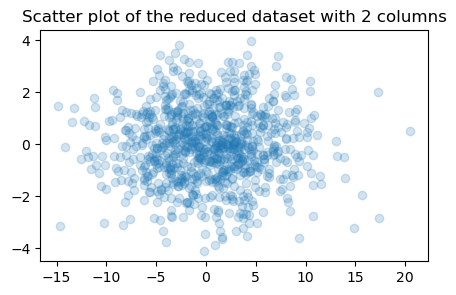

In [5]:
import numpy as np
import pandas as pd
from scipy import linalg as la
from matplotlib import pyplot as plt

#creating the noise
data_noise = pd.DataFrame({
    "x1": x1,
    "x2": x2,
    "x3": x3,
    "noise1": np.random.normal(0, 1/(20*(x1.std())), n_samples),
    "noise2": np.random.normal(0, 1/(20*(x1.std())), n_samples),
    "noise3": np.random.normal(0, 1/(20*(x1.std())), n_samples),
    "noise4": np.random.normal(0, 1/(20*(x1.std())), n_samples),
    "noise5": np.random.normal(0, 1/(20*(x1.std())), n_samples),
    "noise6": np.random.normal(0, 1/(20*(x1.std())), n_samples),
    "noise7": np.random.normal(0, 1/(20*(x1.std())), n_samples),
    "noise8": np.random.normal(0, 1/(20*(x1.std())), n_samples),
    "noise9": np.random.normal(0, 1/(20*(x1.std())), n_samples),
    "noise10": np.random.normal(0, 1/(20*(x1.std())), n_samples),
})

print(data_noise)

#covariance matrix
cov = np.cov(data_noise, rowvar = False)
print("Covariance matrix\n",cov)

#Find the eigenvectors and eigenvalues 
#using the eigendecomposition of the covariance matrix
l, V = la.eig(cov)
l = np.real_if_close(l)

index1 = np.argsort(l)[::-1]
l_sort = l[index1]
V_sort = V[:,index1]

print("\nRESULTS WITH EIGENDECOMPOSITION")
print("Eigenvalues:\n", l, '\n')
print("Eigenvectors:\n", V, '\n')

#using the SVD
U, S, Vt = np.linalg.svd(data_noise)
l_svd = S**2/(n_samples-1)

index2 = np.argsort(l_svd)[::-1]
l_svd_sort = l_svd[index2]
Vt_sort = Vt[:,index2]

print("\n RESULTS WITH SVD")
print("Eigenvalues:\n", l_svd, '\n')
print("Eigenvectors:\n", Vt.T, '\n')

print("Check if the eigenvalues are the same:",np.allclose(l_sort, l_svd_sort, atol=1e-1))
print("Check if the eigenvectors are the same:",np.allclose(abs(V_sort), abs(Vt_sort), atol=0.9))

#print the ordered eigenvalues and eigenvectors
print("\nOrdered eigenvalues: \n",l_sort)
print("Ordered eigenvectors: \n",V_sort)

#select different compontents and calculate the total variability
Lambda = np.diag(l_sort)
print("\nLambda:\n", Lambda, '\n')
print("Trace(cov matrix):\n", cov.trace(), '\n')
print("Trace(Lambda):\n", Lambda.trace(), '\n')

print("By selecting the components x1 and x2, we retain %.2f%% of the total variability" % (100*((Lambda[0, 0]+Lambda[1, 1])/Lambda.trace())))

#Reduce the dimensionality of the system using the eigenvectors of x1 and x2
red_eigenval = np.array([l[0], l[1]], dtype=float)
red_eigenvect = np.array([V[:,0], V[:,1]], dtype=float)
red_eigenvect = red_eigenvect.T

#Redefine the reduced data and plot
data_red = np.dot(data_noise,red_eigenvect)

fig_red, ax_red = plt.subplots(figsize=(5, 3))
ax_red.scatter(data_red[:,0], data_red[:,1], alpha = 0.2)
ax_red.set_title('Scatter plot of the reduced dataset with 2 columns')

#take the eigenvectors as new basis vectors and redefine the data points w.r.t this new basis
dataP_noise = np.dot(data_noise,V)



3\. **Optional**: **PCA on the MAGIC dataset**

Perform a PCA on the magic04.data dataset.

In [3]:
# get the dataset and its description on the proper data directory
#!wget https://archive.ics.uci.edu/ml/machine-learning-databases/magic/magic04.data -P data/
#!wget https://archive.ics.uci.edu/ml/machine-learning-databases/magic/magic04.names -P data/

import numpy as np
import pandas as pd
from scipy import linalg as la
from matplotlib import pyplot as plt


In [4]:
#performing the PCA of the magic dataset
